In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as linm

def generate_data(n):
    # prva klasa
    n1 = n / 2
    n1 = int(n1)
    x1_1 = np.random.normal(0.0, 2, (n1, 1))
    # x1_1 = .21*(6.*np.random.standard_normal((n1,1)));
    x2_1 = np.power(x1_1, 2) + np.random.standard_normal((n1, 1))
    y_1 = np.zeros([n1, 1])
    temp1 = np.concatenate((x1_1, x2_1, y_1), axis=1)

    # druga klasa
    n2 = n - n / 2
    n2 = int(n2)
    x_2 = np.random.multivariate_normal((0, 10), [[0.8, 0], [0, 1.2]], n2)
    y_2 = np.ones([n2, 1])
    temp2 = np.concatenate((x_2, y_2), axis=1)

    data = np.concatenate((temp1, temp2), axis=0)

    # permutiraj podatke
    indices = np.random.permutation(n)
    data = data[indices, :]

    return data

np.random.seed(242)
train_data = generate_data(200)

x1train = train_data[:, 0]
x2train = train_data[:, 1]
ytrain = train_data[:, 2]
xtrain = train_data[:, 0:2]

np.random.seed(12)
learn_data = generate_data(100)
x1learn = learn_data[:, 0]
x2learn = learn_data[:, 1]
ylearn = learn_data[:, 2]
xlearn = learn_data[:, 0:2]



logreg = linm.LogisticRegression()
logreg.fit(xtrain, ytrain)
logreg.predict(xtrain)
param1 = logreg.intercept_
param2 = logreg.coef_


[1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 1. 0.]


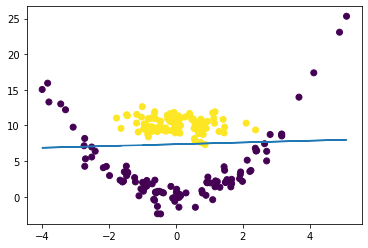

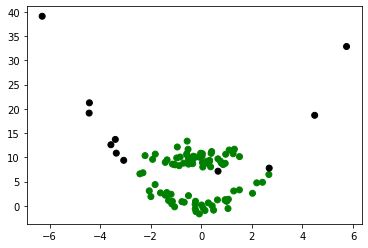

In [2]:

plt.figure(1)
plt.scatter(x1train, x2train, c=ytrain)
x2 = (-logreg.intercept_ - logreg.coef_[0][0]*x1train) / logreg.coef_[0][1]
plt.plot(x1train, x2)


plt.figure(2)

ypred = logreg.predict(xlearn)
print(ypred)
ycol = []
for i in range(100):
    if int(ylearn[i]) == int(ypred[i]):
        ycol.append('green')
    else:
        ycol.append('black')

plt.scatter(x1learn, x2learn, c=ycol)
plt.show()
